<a href="https://colab.research.google.com/github/jorgemdj/Adeline-Network/blob/main/Adeline_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('/content/Tabela#Seção4.6_RNA.xls')

In [2]:
#setting entrance parameters

entrance = np.array(data.drop('d', axis=1))
exit = np.array(data.drop(['x1','x2','x3','x4'], axis=1))

In [33]:
#addding a [-1] collumn to X sheets to use W[0] as a random limiar activation as a sum of other random determined numbers W[i]+...+W[n]

X = np.hstack((np.ones_like(exit)*(-1),entrance))
Y = exit

input_neurons = X.shape[1]
output_neurons = 1

#adding seed to analyze results
np.random.seed(12)
W = np.random.random_sample((output_neurons,input_neurons)).T
print(W)

[[0.15416284]
 [0.7400497 ]
 [0.26331502]
 [0.53373939]
 [0.01457496]]


In [7]:
def adeline_training(x, y, learning_rate, epsilon, W):

  epoch = 0
  Eqm = 0

  #setting random values of Enew and Eold just to start the loop
  Enew = 1000
  Eold = 0

  ycaret_vec = np.zeros_like(Y)

  #defining global variables to use out of the function (in the graph and to get traned W)
  global epochs, EQM, W_test

  #Getting x and y label for the future graph
  epochs = []
  EQM = []

  while abs(Enew - Eold) > epsilon:
    Eold = Eqm


    for i in range(y.shape[0]):

      #Sum Input Data:
      u = np.dot(x[i], W)

      if u > 0:
        ycaret_vec[i] = 1
      else:
        ycaret_vec[i] = -1

      #Updating of weights:
      W = (W.T + learning_rate*(y[i]-u)*x[i]).T


    Eqm = 0
    for j in range(y.shape[0]):
      u = np.dot(x[i], W)
      Eqm = (Eqm + (y[i]-u)**2)/y.shape[0]


    epoch += 1

    epochs.append(epoch)
    EQM.append(Eqm)


    Enew = Eqm

    error = 0

    #Accounting for errors:
    for i in range(0, Y.shape[0]):
      if ycaret_vec[i] != Y[i]:
        error += 1
      else: continue

    if int((epoch)%(15)) == 0:
        print(f'Epoch:  [{epoch}] error: {error} / {Y.shape[0]} [{100*error/Y.shape[0]:.2f}% ]  EQM: {Eqm-Eold}')

  #Getting W from the training
  W_test = np.copy(W)
  return W, epoch


In [34]:
x = X
y = Y
learning_rate = 0.0025
epsilon = 10**(-6)

adeline_training(x, y, learning_rate, epsilon, W)

Epoch:  [15] error: 11 / 35 [31.43% ]  EQM: [-0.0003289]
Epoch:  [30] error: 9 / 35 [25.71% ]  EQM: [-0.00019976]
Epoch:  [45] error: 8 / 35 [22.86% ]  EQM: [-0.00015485]
Epoch:  [60] error: 8 / 35 [22.86% ]  EQM: [-0.00012456]
Epoch:  [75] error: 7 / 35 [20.00% ]  EQM: [-0.00010069]
Epoch:  [90] error: 7 / 35 [20.00% ]  EQM: [-8.14264805e-05]
Epoch:  [105] error: 7 / 35 [20.00% ]  EQM: [-6.58180286e-05]
Epoch:  [120] error: 5 / 35 [14.29% ]  EQM: [-5.31572837e-05]
Epoch:  [135] error: 4 / 35 [11.43% ]  EQM: [-4.28792339e-05]
Epoch:  [150] error: 2 / 35 [5.71% ]  EQM: [-3.45298981e-05]
Epoch:  [165] error: 2 / 35 [5.71% ]  EQM: [-2.77436831e-05]
Epoch:  [180] error: 2 / 35 [5.71% ]  EQM: [-2.22257732e-05]
Epoch:  [195] error: 1 / 35 [2.86% ]  EQM: [-1.77381225e-05]
Epoch:  [210] error: 1 / 35 [2.86% ]  EQM: [-1.40882754e-05]
Epoch:  [225] error: 2 / 35 [5.71% ]  EQM: [-1.11204321e-05]
Epoch:  [240] error: 2 / 35 [5.71% ]  EQM: [-8.70830167e-06]
Epoch:  [255] error: 2 / 35 [5.71% ]  EQM

(array([[-1.41263133],
        [ 1.23428518],
        [ 1.42380489],
        [-0.16815374],
        [-1.02388462]]),
 339)

In [35]:
#Validation:

test = pd.read_excel('/content/Tabela#4.3_RNA.xls')

#Adding [-1] collumn as the training set
entrance_test = np.array(test)
X_test = np.hstack((np.ones((entrance_test.shape[0],1))*(-1),entrance_test))

#Getting W from the training
W_test

array([[-1.41263133],
       [ 1.23428518],
       [ 1.42380489],
       [-0.16815374],
       [-1.02388462]])

In [36]:
#Answers:

def matrix_bipolar_step(z: np.ndarray):
  for i in range(z.shape[0]):
    for j in range(z.shape[1]):
      if z[i,j]>= 0:
        z[i,j] = 1
      else:
        z[i,j] = -1
  return z

Y_test = np.dot(X_test,W_test)
matrix_bipolar_step(Y_test)

array([[-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.]])

Text(0.5, 1.0, 'Erro Quadrático Médio por Época')

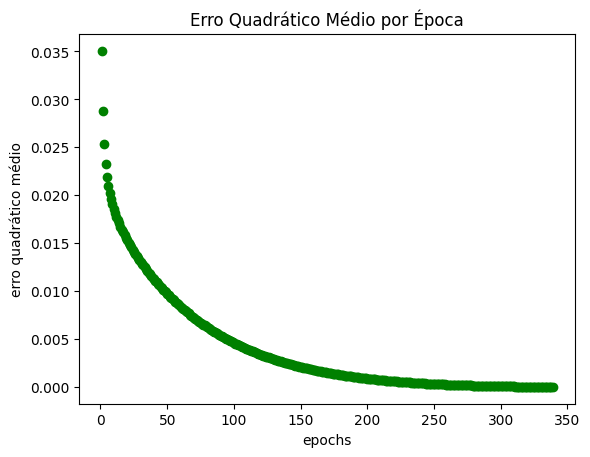

In [37]:
plt.plot(epochs, EQM, 'go')
plt.ylabel('erro quadrático médio')
plt.xlabel('epochs')
plt.title('Erro Quadrático Médio por Época')